# # Modelagem 2-dim | 128 mfccs

In [1]:
import keras as K
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from random import choice

from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

%matplotlib inline

In [2]:
DIR_DATAFRAMES = '/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/DATAFRAMES'
DIR_MFCC = '/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/MFCC'

In [3]:
!ls -lah $DIR_DATAFRAMES

total 4,1G
drwxrwxrwx 1 hbrandao hbrandao 4,0K mar 21 23:15 .
drwxrwxrwx 1 hbrandao hbrandao    0 mar 21 23:49 ..
-rwxrwxrwx 1 hbrandao hbrandao 181K mar 21 23:27 Xfusao.csv
-rwxrwxrwx 1 hbrandao hbrandao 1,3G mar 23 00:32 Xsinal_0padded.npy
-rwxrwxrwx 1 hbrandao hbrandao 372M mar 23 00:32 Xsinal.npy
-rwxrwxrwx 1 hbrandao hbrandao 1,3G mar 23 00:32 Xsinal_stretch_0padded.npy
-rwxrwxrwx 1 hbrandao hbrandao 1,3G mar 23 00:32 Xsinal_tile_0padded.npy


In [4]:
!ls -lahR $DIR_MFCC

/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/MFCC:
total 0
drwxrwxrwx 1 hbrandao hbrandao 0 mar 22 01:49 .
drwxrwxrwx 1 hbrandao hbrandao 0 mar 21 23:49 ..
drwxrwxrwx 1 hbrandao hbrandao 0 mar 22 01:55 128
drwxrwxrwx 1 hbrandao hbrandao 0 mar 22 01:54 64
drwxrwxrwx 1 hbrandao hbrandao 0 mar 22 01:53 mean

/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/MFCC/128:
total 944M
drwxrwxrwx 1 hbrandao hbrandao    0 mar 22 01:55 .
drwxrwxrwx 1 hbrandao hbrandao    0 mar 22 01:49 ..
-rwxrwxrwx 1 hbrandao hbrandao 315M mar 22 02:10 Xsinal_pad_128mfcc.npy
-rwxrwxrwx 1 hbrandao hbrandao 315M mar 22 02:10 Xsinal_stretch_128mfcc.npy
-rwxrwxrwx 1 hbrandao hbrandao 315M mar 22 02:11 Xsinal_tile_128mfcc.npy

/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/MFCC/64:
total 472M
drwxrwxrwx 1 hbrandao hbrandao    0 mar 22 01:54 .
drwxrwxrwx 1 hbrandao hbrandao    0 mar 22 01:49 ..
-rwxrwxrwx 1 hbrandao hbrandao 158M mar 22 02:05 Xsinal_pad_64mfcc.npy
-rwxrwxrwx 1 hbrandao hbrandao 158M 

In [5]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [6]:
DIR_DATAFRAMES = '/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/DATAFRAMES'
DIR_MFCC = '/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/MFCC'

In [7]:
!ls -lahR $DIR_MFCC

/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/MFCC:
total 0
drwxrwxrwx 1 hbrandao hbrandao 0 mar 22 01:49 .
drwxrwxrwx 1 hbrandao hbrandao 0 mar 21 23:49 ..
drwxrwxrwx 1 hbrandao hbrandao 0 mar 22 01:55 128
drwxrwxrwx 1 hbrandao hbrandao 0 mar 22 01:54 64
drwxrwxrwx 1 hbrandao hbrandao 0 mar 22 01:53 mean

/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/MFCC/128:
total 944M
drwxrwxrwx 1 hbrandao hbrandao    0 mar 22 01:55 .
drwxrwxrwx 1 hbrandao hbrandao    0 mar 22 01:49 ..
-rwxrwxrwx 1 hbrandao hbrandao 315M mar 22 02:10 Xsinal_pad_128mfcc.npy
-rwxrwxrwx 1 hbrandao hbrandao 315M mar 22 02:10 Xsinal_stretch_128mfcc.npy
-rwxrwxrwx 1 hbrandao hbrandao 315M mar 22 02:11 Xsinal_tile_128mfcc.npy

/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/MFCC/64:
total 472M
drwxrwxrwx 1 hbrandao hbrandao    0 mar 22 01:54 .
drwxrwxrwx 1 hbrandao hbrandao    0 mar 22 01:49 ..
-rwxrwxrwx 1 hbrandao hbrandao 158M mar 22 02:05 Xsinal_pad_64mfcc.npy
-rwxrwxrwx 1 hbrandao hbrandao 158M 

In [8]:
PHYS_DEVICE_NAME = tf.config.list_physical_devices('GPU')[0].name[-5:]
if PHYS_DEVICE_NAME:
    print(PHYS_DEVICE_NAME)
else:
    raise Exception('GPU não encontrada')

GPU:0


2023-04-07 20:37:29.243501: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-07 20:37:29.262244: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-07 20:37:29.262388: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


## Dados
___

In [9]:
X128 = np.load(f'{DIR_MFCC}/mean/Xsinal_128mfcc_mean.npy')

x128train, x128test, *_ = train_test_split(X128)
x128train.shape, x128test.shape

((1023, 128), (341, 128))

## Autoencoder
___

In [10]:
dim = X128.shape[-1]

In [11]:
def autoencoder128():
    inp_enc = K.Input(batch_shape=(1,dim))
    enc = layers.Dense(units=int(dim/2), activation='relu')(inp_enc)
    encoder = K.Model(inp_enc, enc)

    inp_dec = K.Input(batch_shape=(1,int(dim/2)))
    dec = layers.Dense(units=dim, activation='linear')(inp_dec)
    decoder = K.Model(inp_dec, dec)

    inp_ae = K.Input(batch_shape=(1,dim))
    enc_ae = encoder(inp_ae)
    dec_ae = decoder(enc_ae)

    ae = K.Model(inp_ae, dec_ae, name='autoencoder')
    ae.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return ae, encoder, decoder

### x128 train

In [13]:
# epochs = 1000

# es = EarlyStopping(monitor='loss', mode='min', min_delta=0.01, patience=20, verbose=1)

# mc = ModelCheckpoint('autoencoder_mean_128mfcc.hdf5',
#                      monitor='loss', verbose=1, save_best_only=True, mode='min')

# with tf.device(PHYS_DEVICE_NAME):
#     K.backend.clear_session()
#     modelo128, encoder128, decoder128 = autoencoder128()
#     history = modelo128.fit(x=x128train,
#                            y=x128train,
#                            epochs=epochs,
#                            batch_size=10,
#                            shuffle=True,
#                            validation_data=(x128test, x128test),
#                            callbacks=[es, mc]
#                           )

2023-04-07 20:37:40.262055: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
 96/103 [==========================>...] - ETA: 0s - loss: 573.0837 - mae: 8.8779  

2023-04-07 20:37:40.888275: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


103/103 [==============================] - 1s 2ms/step - loss: 542.7560 - mae: 8.6382 - val_loss: 75.5113 - val_mae: 4.8627

Epoch 00001: loss improved from inf to 542.75598, saving model to autoencoder_mean_128mfcc.hdf5
Epoch 2/1000
103/103 [==============================] - 0s 1ms/step - loss: 58.1895 - mae: 4.3339 - val_loss: 47.3984 - val_mae: 3.9114

Epoch 00002: loss improved from 542.75598 to 58.18950, saving model to autoencoder_mean_128mfcc.hdf5
Epoch 3/1000
103/103 [==============================] - 0s 1ms/step - loss: 39.6782 - mae: 3.7005 - val_loss: 34.1109 - val_mae: 3.4533

Epoch 00003: loss improved from 58.18950 to 39.67821, saving model to autoencoder_mean_128mfcc.hdf5
Epoch 4/1000
103/103 [==============================] - 0s 1ms/step - loss: 29.7272 - mae: 3.3289 - val_loss: 25.8427 - val_mae: 3.1617

Epoch 00004: loss improved from 39.67821 to 29.72719, saving model to autoencoder_mean_128mfcc.hdf5
Epoch 5/1000
103/103 [==============================] - 0s 1ms/step

Epoch 36/1000
103/103 [==============================] - 0s 1ms/step - loss: 2.5585 - mae: 1.1462 - val_loss: 2.8082 - val_mae: 1.1883

Epoch 00036: loss improved from 2.60389 to 2.55853, saving model to autoencoder_mean_128mfcc.hdf5
Epoch 37/1000
103/103 [==============================] - 0s 1ms/step - loss: 2.4869 - mae: 1.1286 - val_loss: 2.6764 - val_mae: 1.1776

Epoch 00037: loss improved from 2.55853 to 2.48692, saving model to autoencoder_mean_128mfcc.hdf5
Epoch 38/1000
103/103 [==============================] - 0s 1ms/step - loss: 2.4503 - mae: 1.1197 - val_loss: 2.6416 - val_mae: 1.1500

Epoch 00038: loss improved from 2.48692 to 2.45033, saving model to autoencoder_mean_128mfcc.hdf5
Epoch 39/1000
103/103 [==============================] - 0s 1ms/step - loss: 2.3595 - mae: 1.0973 - val_loss: 2.5911 - val_mae: 1.1593

Epoch 00039: loss improved from 2.45033 to 2.35951, saving model to autoencoder_mean_128mfcc.hdf5
Epoch 40/1000
103/103 [==============================] - 0s 1ms/


Epoch 00071: loss improved from 1.24151 to 1.21660, saving model to autoencoder_mean_128mfcc.hdf5
Epoch 72/1000
103/103 [==============================] - 0s 1ms/step - loss: 1.2089 - mae: 0.7710 - val_loss: 1.3754 - val_mae: 0.8016

Epoch 00072: loss improved from 1.21660 to 1.20889, saving model to autoencoder_mean_128mfcc.hdf5
Epoch 73/1000
103/103 [==============================] - 0s 1ms/step - loss: 1.1900 - mae: 0.7645 - val_loss: 1.3709 - val_mae: 0.8026

Epoch 00073: loss improved from 1.20889 to 1.18996, saving model to autoencoder_mean_128mfcc.hdf5
Epoch 74/1000
103/103 [==============================] - 0s 1ms/step - loss: 1.1931 - mae: 0.7631 - val_loss: 1.3589 - val_mae: 0.8007

Epoch 00074: loss did not improve from 1.18996
Epoch 75/1000
103/103 [==============================] - 0s 1ms/step - loss: 1.1833 - mae: 0.7632 - val_loss: 1.3588 - val_mae: 0.7978

Epoch 00075: loss improved from 1.18996 to 1.18332, saving model to autoencoder_mean_128mfcc.hdf5
Epoch 76/1000
10

103/103 [==============================] - 0s 1ms/step - loss: 0.8417 - mae: 0.6326 - val_loss: 0.9879 - val_mae: 0.6673

Epoch 00110: loss improved from 0.88566 to 0.84168, saving model to autoencoder_mean_128mfcc.hdf5
Epoch 111/1000
103/103 [==============================] - 0s 1ms/step - loss: 0.8469 - mae: 0.6314 - val_loss: 0.9892 - val_mae: 0.6598

Epoch 00111: loss did not improve from 0.84168
Epoch 112/1000
103/103 [==============================] - 0s 1ms/step - loss: 0.8484 - mae: 0.6331 - val_loss: 1.0673 - val_mae: 0.7005

Epoch 00112: loss did not improve from 0.84168
Epoch 113/1000
103/103 [==============================] - 0s 1ms/step - loss: 0.8577 - mae: 0.6425 - val_loss: 0.9732 - val_mae: 0.6669

Epoch 00113: loss did not improve from 0.84168
Epoch 114/1000
103/103 [==============================] - 0s 1ms/step - loss: 0.8622 - mae: 0.6406 - val_loss: 1.1649 - val_mae: 0.7304

Epoch 00114: loss did not improve from 0.84168
Epoch 115/1000
103/103 [====================

103/103 [==============================] - 0s 1ms/step - loss: 0.7461 - mae: 0.5902 - val_loss: 0.9175 - val_mae: 0.6370

Epoch 00150: loss did not improve from 0.73673
Epoch 151/1000
103/103 [==============================] - 0s 1ms/step - loss: 0.7391 - mae: 0.5861 - val_loss: 0.9588 - val_mae: 0.6576

Epoch 00151: loss did not improve from 0.73673
Epoch 152/1000
103/103 [==============================] - 0s 1ms/step - loss: 0.7872 - mae: 0.6086 - val_loss: 0.9849 - val_mae: 0.6561

Epoch 00152: loss did not improve from 0.73673
Epoch 153/1000
103/103 [==============================] - 0s 1ms/step - loss: 0.7750 - mae: 0.6006 - val_loss: 0.9000 - val_mae: 0.6312

Epoch 00153: loss did not improve from 0.73673
Epoch 154/1000
103/103 [==============================] - 0s 1ms/step - loss: 0.7460 - mae: 0.5890 - val_loss: 0.9075 - val_mae: 0.6308

Epoch 00154: loss did not improve from 0.73673
Epoch 155/1000
103/103 [==============================] - 0s 1ms/step - loss: 0.7595 - mae: 0.5

103/103 [==============================] - 0s 1ms/step - loss: 0.7215 - mae: 0.5807 - val_loss: 0.8964 - val_mae: 0.6259

Epoch 00193: loss did not improve from 0.68663
Epoch 194/1000
103/103 [==============================] - 0s 1ms/step - loss: 0.7450 - mae: 0.5867 - val_loss: 0.9495 - val_mae: 0.6438

Epoch 00194: loss did not improve from 0.68663
Epoch 195/1000
103/103 [==============================] - 0s 1ms/step - loss: 0.7286 - mae: 0.5784 - val_loss: 0.8748 - val_mae: 0.6116

Epoch 00195: loss did not improve from 0.68663
Epoch 196/1000
103/103 [==============================] - 0s 1ms/step - loss: 0.7061 - mae: 0.5671 - val_loss: 0.8679 - val_mae: 0.6148

Epoch 00196: loss did not improve from 0.68663
Epoch 197/1000
103/103 [==============================] - 0s 1ms/step - loss: 0.7020 - mae: 0.5667 - val_loss: 0.8577 - val_mae: 0.6146

Epoch 00197: loss did not improve from 0.68663
Epoch 198/1000
103/103 [==============================] - 0s 1ms/step - loss: 0.6947 - mae: 0.5

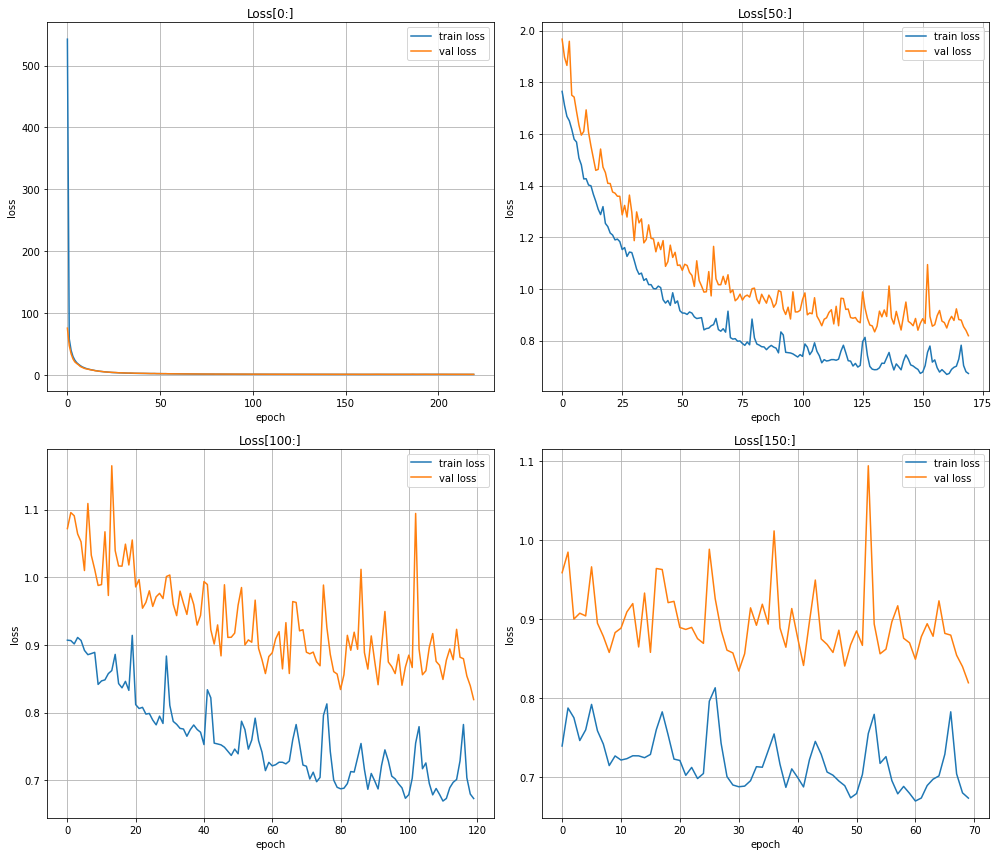

In [14]:
plt.figure(figsize=(14, 12))

row, col = 2, 2

for i,r in enumerate((0, 50, 100, 150)):
    plt.subplot(row,col,i+1)
    plt.plot(history.history['loss'][r:])
    plt.plot(history.history['val_loss'][r:])
    plt.title(f'Loss[{r}:]')
    plt.legend(['train loss', 'val loss'], loc='upper right')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.grid()

plt.tight_layout()
plt.show()

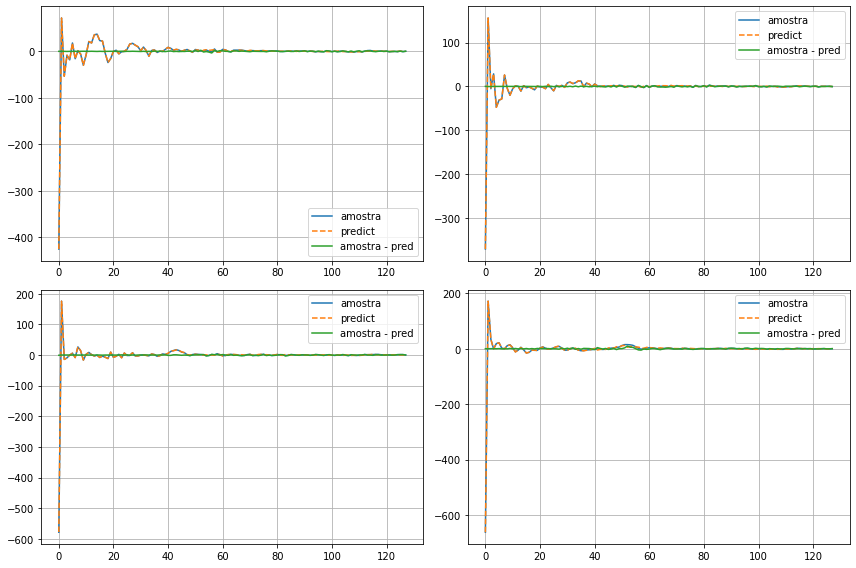

In [17]:
plt.figure(figsize=(12,8))

row, col, idx = 2, 2, 1

for i in range(row*col):
    reg = choice(x128train).reshape(1,dim)
    pred = modelo128.predict(reg)
    diff = reg - pred

    plt.subplot(row, col, idx)
    plt.plot(reg.flatten(), label='amostra')
    plt.plot(pred.flatten(), label='predict', linestyle='--')
    plt.plot(diff.flatten(), label='amostra - pred')
    plt.legend()
    plt.grid()
    idx += 1

plt.tight_layout()
plt.show()

In [18]:
pred_x128 = modelo128.predict(x128test)
loss_x128 = K.losses.mse(pred_x128, x128test)

np.mean(loss_x128)

0.8192488

In [19]:
#
#
modelo128 = K.models.load_model('autoencoder_mean_128mfcc.hdf5')
#
#

## Classificador

In [20]:
X128.shape

(1364, 128)

In [21]:
Xfusao = pd.read_csv(f'{DIR_DATAFRAMES}/Xfusao.csv', delimiter=';')
Xfusao.shape

(1364, 8)

In [22]:
DE_PARA_EMOCAO = {
    'alegria': np.array([1,0,0,0]),
    'medo': np.array([0,1,0,0]),
    'raiva': np.array([0,0,1,0]),
    'surpresa': np.array([0,0,0,1]),
}

DE_PARA_INTENSIDADE = {
    'fraca': np.array([1,0,0,0]),
    'moderada': np.array([0,1,0,0]),
    'forte': np.array([0,0,1,0]),
    'pico': np.array([0,0,0,1]),
}

def encoding_emocao(emocao: str):
    return DE_PARA_EMOCAO.get(emocao)

def encoding_intensidade(intensidade: str):
    return DE_PARA_INTENSIDADE.get(intensidade)

In [23]:
Xfusao['emo'] = Xfusao['emocao'].apply(encoding_emocao)
Xfusao['int'] = Xfusao['intensidade'].apply(encoding_intensidade)

In [24]:
Xfusao.drop(labels=['path', 'pessoa', 'genero', 'duracao', 'emocao', 'intensidade'],
            axis=1, inplace=True)

In [27]:
Xfusao = pd.concat(objs=[Xfusao, pd.DataFrame(X128)], axis=1)
Xfusao.tail()

,dataset,arquivo,emo,int,0,1,2,3,4,5,...,118,119,120,121,122,123,124,125,126,127
1359,vivae,S11_surprise_low_03.wav,"[0, 0, 0, 1]","[1, 0, 0, 0]",-429.589874,133.411682,-50.135876,-2.183036,-23.552435,16.127447,...,0.453263,0.020251,0.110962,0.077394,0.070115,0.212857,0.227376,0.218938,0.187825,-0.362561
1360,vivae,S11_surprise_moderate_01.wav,"[0, 0, 0, 1]","[0, 1, 0, 0]",-464.718903,134.753693,-7.355528,23.141539,-41.095829,-12.439143,...,0.464015,0.366968,0.225760,-0.610613,0.106049,-0.559178,0.641056,-0.188407,0.255548,-0.449418
1361,vivae,S11_surprise_peak_04.wav,"[0, 0, 0, 1]","[0, 0, 0, 1]",-335.451172,-14.470435,-37.541733,-11.240404,-18.821291,18.479385,...,-0.083279,0.350417,0.443159,-0.515007,-0.159817,0.333958,0.261606,0.322183,0.056174,0.317522
1362,vivae,S11_surprise_strong_011.wav,"[0, 0, 0, 1]","[0, 0, 1, 0]",-282.711945,70.662437,-39.934624,-4.440723,-53.481644,-15.649154,...,0.432736,0.565422,0.277756,-0.331286,-0.382815,0.176906,-0.530869,-0.196507,0.421675,-0.335516
1363,vivae,S11_surprise_strong_012.wav,"[0, 0, 0, 1]","[0, 0, 1, 0]",-399.486450,103.588158,-58.144569,-14.114857,-41.650688,10.208106,...,0.554575,-0.019772,0.224496,0.383438,0.125887,0.031707,0.168092,-0.103950,-0.231028,-0.107261


In [28]:
Xfusao_verbo = Xfusao[Xfusao['dataset'] == 'verbo']
Xfusao_verbo.shape

(666, 132)

In [29]:
Xfusao_vivae = Xfusao[Xfusao['dataset'] == 'vivae']
Xfusao_vivae.shape

(698, 132)

In [30]:
def realizar_encoding(x, dim=dim):
    return encoder128(x.reshape(1,dim).astype('float32'))

In [31]:
x128_vivae_enc = np.array([realizar_encoding(x) for x in Xfusao_vivae.values[:,4:]])
x128_vivae_enc.shape

(698, 1, 64)

In [32]:
y128_vivae = np.array([x.reshape(1,4) for x in Xfusao_vivae['int'].values])
y128_vivae.shape

(698, 1, 4)

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(x128_vivae_enc, y128_vivae)

xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((523, 1, 64), (523, 1, 4), (175, 1, 64), (175, 1, 4))

### Modelo

In [35]:
def modelo_clf_intensidade():
    K.backend.clear_session()
    modelo = K.Sequential()
    modelo.add(layers.Dense(units=32, activation='relu', input_shape=(1,64)))
    modelo.add(layers.Dense(units=16, activation='relu'))
    modelo.add(layers.Dense(units=8, activation='relu'))
    modelo.add(layers.Dense(units=4, activation='softmax'))

    modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    print(modelo.summary())
    return modelo

modelo_clf_intensidade()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 32)             2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1, 16)             528       
_________________________________________________________________
dense_2 (Dense)              (None, 1, 8)              136       
_________________________________________________________________
dense_3 (Dense)              (None, 1, 4)              36        
Total params: 2,780
Trainable params: 2,780
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
epochs = 1000

es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.001, patience=20, verbose=1)

mc = ModelCheckpoint('classificador_intensidade_128mfcc_encoded.hdf5',
                     monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


with tf.device(PHYS_DEVICE_NAME):
    K.backend.clear_session()
    clf_intensidade = modelo_clf_intensidade()
    history = clf_intensidade.fit(x=xtrain,
                                  y=ytrain,
                                  epochs=epochs,
                                  batch_size=2,
                                  shuffle=True,
                                  validation_data=(xtest, ytest),
                                  callbacks=[es, mc]
                                 )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 32)             2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1, 16)             528       
_________________________________________________________________
dense_2 (Dense)              (None, 1, 8)              136       
_________________________________________________________________
dense_3 (Dense)              (None, 1, 4)              36        
Total params: 2,780
Trainable params: 2,780
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
262/262 [==============================] - 1s 3ms/step - loss: 2.7318 - accuracy: 0.2734 - val_loss: 1.8384 - val_accuracy: 0.3086

Epoch 00001: val_accuracy improved from -inf to 0.30857, saving model to classificador_intensidade_128

262/262 [==============================] - 1s 2ms/step - loss: 0.8279 - accuracy: 0.5851 - val_loss: 1.1082 - val_accuracy: 0.5714

Epoch 00034: val_accuracy did not improve from 0.61714
Epoch 35/1000
262/262 [==============================] - 1s 2ms/step - loss: 0.8223 - accuracy: 0.6195 - val_loss: 1.0695 - val_accuracy: 0.5886

Epoch 00035: val_accuracy did not improve from 0.61714
Epoch 36/1000
262/262 [==============================] - 1s 2ms/step - loss: 0.8281 - accuracy: 0.6119 - val_loss: 1.0961 - val_accuracy: 0.5543

Epoch 00036: val_accuracy did not improve from 0.61714
Epoch 37/1000
262/262 [==============================] - 1s 2ms/step - loss: 0.8071 - accuracy: 0.6004 - val_loss: 1.1092 - val_accuracy: 0.5200

Epoch 00037: val_accuracy did not improve from 0.61714
Epoch 38/1000
262/262 [==============================] - 1s 2ms/step - loss: 0.7826 - accuracy: 0.6214 - val_loss: 1.0830 - val_accuracy: 0.5657

Epoch 00038: val_accuracy did not improve from 0.61714
Epoch 39/

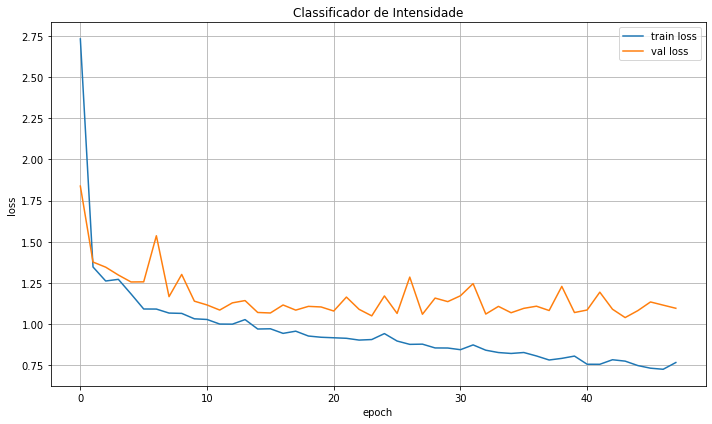

In [37]:
plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'], loc='upper right')
plt.title('Classificador de Intensidade')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()

plt.tight_layout()
plt.show()

In [38]:
_ = classification_report(
    y_true=[np.argmax(x) for x in ytest],
    y_pred=[np.argmax(x) for x in clf_intensidade.predict(xtest)],
    target_names=DE_PARA_INTENSIDADE.keys()
)

print(_)

              precision    recall  f1-score   support

       fraca       0.68      0.55      0.61        42
    moderada       0.40      0.40      0.40        48
       forte       0.47      0.58      0.52        48
        pico       0.69      0.65      0.67        37

    accuracy                           0.54       175
   macro avg       0.56      0.54      0.55       175
weighted avg       0.55      0.54      0.54       175



In [39]:
#
#
clf_intensidade = K.models.load_model('classificador_intensidade_128mfcc_encoded.hdf5')
#
#

In [40]:
_ = classification_report(
    y_true=[np.argmax(x) for x in ytest],
    y_pred=[np.argmax(x) for x in clf_intensidade.predict(xtest)],
    target_names=DE_PARA_INTENSIDADE.keys(),
    zero_division=0
)

print(_)

              precision    recall  f1-score   support

       fraca       0.63      0.76      0.69        42
    moderada       0.59      0.40      0.48        48
       forte       0.55      0.65      0.60        48
        pico       0.72      0.70      0.71        37

    accuracy                           0.62       175
   macro avg       0.62      0.63      0.62       175
weighted avg       0.62      0.62      0.61       175



#### VERBO

In [41]:
xtest_verbo = np.array([realizar_encoding(x) for x in Xfusao_verbo.values[:,4:]])
pred_verbo = [np.argmax(x) for x in clf_intensidade.predict(xtest_verbo)]

In [42]:
np.array(pred_verbo)

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 3, 2, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 3, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1,
       1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

## Decomposição

In [43]:
LABEL_INTENSIDADE = {
    0: 'fraca',
    1: 'moderada',
    2: 'forte',
    3: 'pico'
}

In [44]:
pred_verbo_label = [LABEL_INTENSIDADE.get(_) for _ in pred_verbo]

In [46]:
pred_vivae_label = [
        LABEL_INTENSIDADE.get(np.argmax(x)) for x in clf_intensidade.predict(x128_vivae_enc)
]

In [47]:
x128_vivae_enc.shape, xtest_verbo.shape

((698, 1, 64), (666, 1, 64))

In [48]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

### PCA

@VIVAE MFCCs

In [53]:
pca = PCA(n_components=2)
Xpca = pca.fit_transform(Xfusao_vivae.values[:,4:])
Xpca.shape

(698, 2)

In [54]:
df_pca = pd.DataFrame(data=Xpca, columns=('c1', 'c2'))
df_pca['label'] = [LABEL_INTENSIDADE.get(np.argmax(x)) for x in y128_vivae]
df_pca.head()

,c1,c2,label
0,133.963611,-30.718626,fraca
1,8.571517,20.413393,fraca
2,-1.517203,-6.958117,fraca
3,88.177633,-4.916108,fraca
4,11.184534,6.211959,fraca


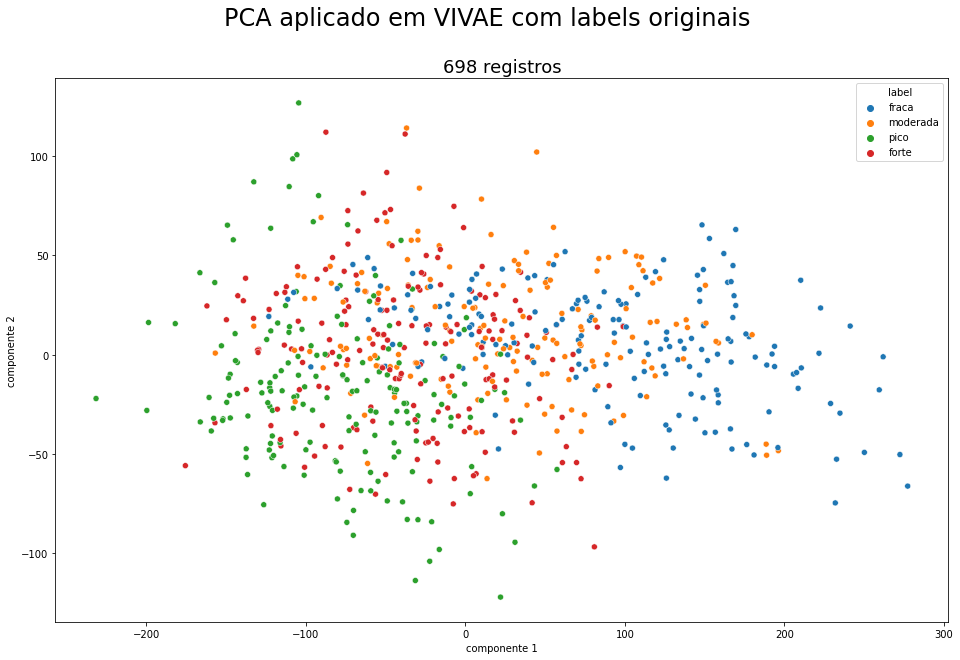

In [55]:
plt.figure(figsize=(16, 10))

sns.scatterplot(data=df_pca, x='c1', y='c2', hue='label')
plt.suptitle('PCA aplicado em VIVAE com labels originais', fontsize=24)
plt.title(f'{df_pca.shape[0]} registros', fontsize=18)
plt.xlabel('componente 1')
plt.ylabel('componente 2')

plt.show()

@VIVAE AE

In [57]:
pca = PCA(n_components=2)
Xpca = pca.fit_transform([*x128_vivae_enc.reshape(698,64)])
Xpca.shape

(698, 2)

In [58]:
df_pca = pd.DataFrame(data=Xpca, columns=('c1', 'c2'))
df_pca['label'] = [LABEL_INTENSIDADE.get(np.argmax(x)) for x in y128_vivae]
df_pca.head()

,c1,c2,label
0,73.369592,-16.898039,fraca
1,-4.704065,0.573866,fraca
2,-4.637275,-5.198417,fraca
3,51.068371,-1.332916,fraca
4,-6.467990,6.416402,fraca


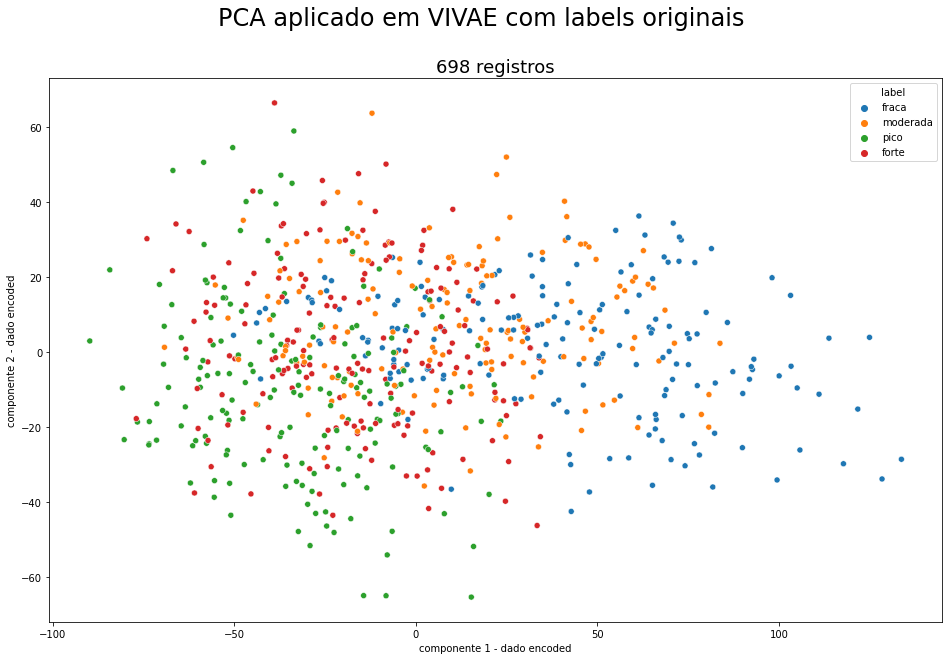

In [59]:
plt.figure(figsize=(16, 10))

sns.scatterplot(data=df_pca, x='c1', y='c2', hue='label')
plt.suptitle('PCA aplicado em VIVAE com labels originais', fontsize=24)
plt.title(f'{df_pca.shape[0]} registros', fontsize=18)
plt.xlabel('componente 1 - dado encoded')
plt.ylabel('componente 2 - dado encoded')

plt.show()

@AE VERBO e VIVAE

In [60]:
pca = PCA(n_components=2)
Xpca = pca.fit_transform([*x128_vivae_enc.reshape(698,64), *xtest_verbo.reshape(666,64)])
Xpca.shape

(1364, 2)

In [61]:
df_pca = pd.DataFrame(data=Xpca, columns=('c1', 'c2'))
df_pca['label'] = [*pred_vivae_label, *[_ + ' (verbo)' for _ in pred_verbo_label]]
df_pca.head()

,c1,c2,label
0,101.179746,-38.093489,fraca
1,38.776139,9.318421,fraca
2,45.846605,18.296328,fraca
3,81.770068,-28.368625,fraca
4,45.244587,18.916581,moderada


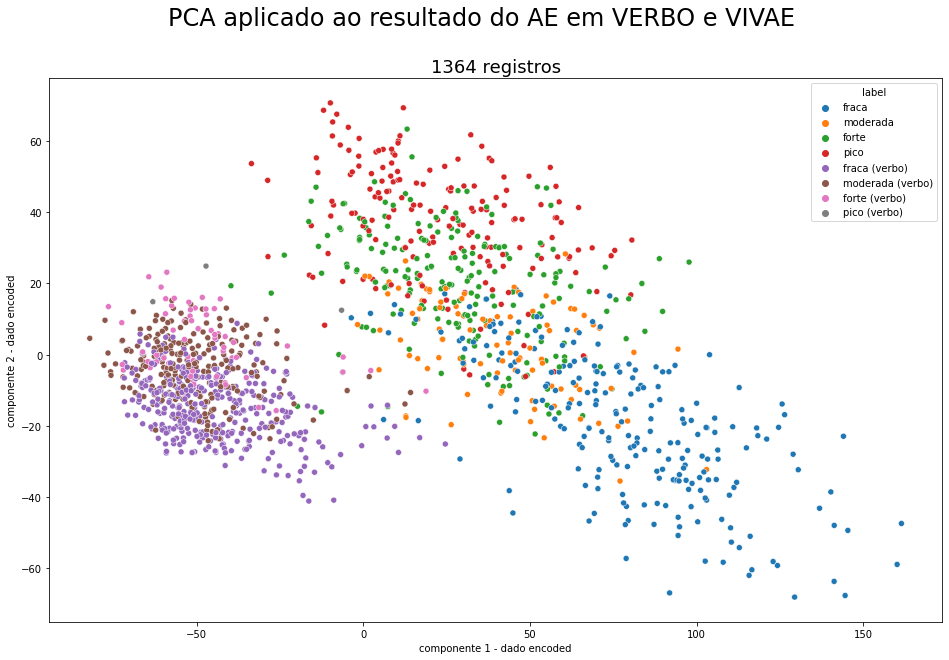

In [62]:
plt.figure(figsize=(16, 10))

sns.scatterplot(data=df_pca, x='c1', y='c2', hue='label')
plt.suptitle('PCA aplicado ao resultado do AE em VERBO e VIVAE', fontsize=24)
plt.title(f'{df_pca.shape[0]} registros', fontsize=18)
plt.xlabel('componente 1 - dado encoded')
plt.ylabel('componente 2 - dado encoded')

plt.show()